In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
all_houses = data.shape[0]
houses_in_OldTown = data[data['Neighborhood'] == 'OldTown'].shape[0]
print('Probability of picking a house in OldTown: {}'.format(houses_in_OldTown/all_houses))

Probability of picking a house in OldTown: 0.0773972602739726


* Thus, from the output above we can state that:
* At random, the probability of choosing a house from the data set in the "OldTown" neighborhood is 0.077

* There are 10 M&Ms left in the bag: 5 are green, and 5 are blue.

* What is the probability of getting 3 blue candies in a row?

* The probability of getting the first blue candy is 5/10, or 1/2.
* When we pick a blue candy, though, we remove it from the bag. We're left with 9 candies in total with (5-1 =)4 Blue ones.
* So the probability of getting another blue is 4/9.
* Similarly, the probability of picking a third blue candy is 3/8


* Since we're calculating the probability of picking 1 Blue Candy AND 1 Blue Candy AND 1 Blue Candy

* Our final probability is 1/2 * 4/9 * 3/8, or .0833. So, there is an 8.3% chance of picking three blue candies in a row.
* Simple tricks: Whenever you have to verbally say AND (like we just did above), you will want to MULTIPLY the probabilities

* Whenever you have to verbally say OR, you will want to ADD the probabilities.

In [4]:
## Enter condtional probability code
(houses_in_OldTown/all_houses) * ((houses_in_OldTown - 1)/(all_houses - 1))

0.0059413935234303855

## Central Limit Theorem - Important! (1/2)
* The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.


Concept-Alert
## Central Limit Theorem - Important! (2/2)
* According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question as the sample size increases, notwithstanding the actual distribution of the data, and whether it is normal or non-normal. As a general rule, sample sizes equal to or greater than 30 are considered sufficient for the central limit theorem to hold, meaning the distribution of the sample means is fairly normally distributed.

## Central Limit Theorem - Important (1/2)
* Many practices in statistics, such as those involving hypothesis testing or confidence intervals, make some assumptions concerning the population that the data was obtained from.

* One assumption that is initially made in a statistics course is that the populations that we work with are normally distributed.

## Concept-Alert
## Central Limit Theorem - Important (2/2)
* The assumption that data is from a normal distribution simplifies matters but seems a little unrealistic.

* Just a little work with some real-world data shows that outliers, skewness, multiple peaks and asymmetry show up quite routinely like the one John encountered with SalePrice above.

* We can get around the problem of data from a population that is not normal.

* The use of an appropriate sample size and the central limit theorem help us to get around the problem of data from populations that are not normal.

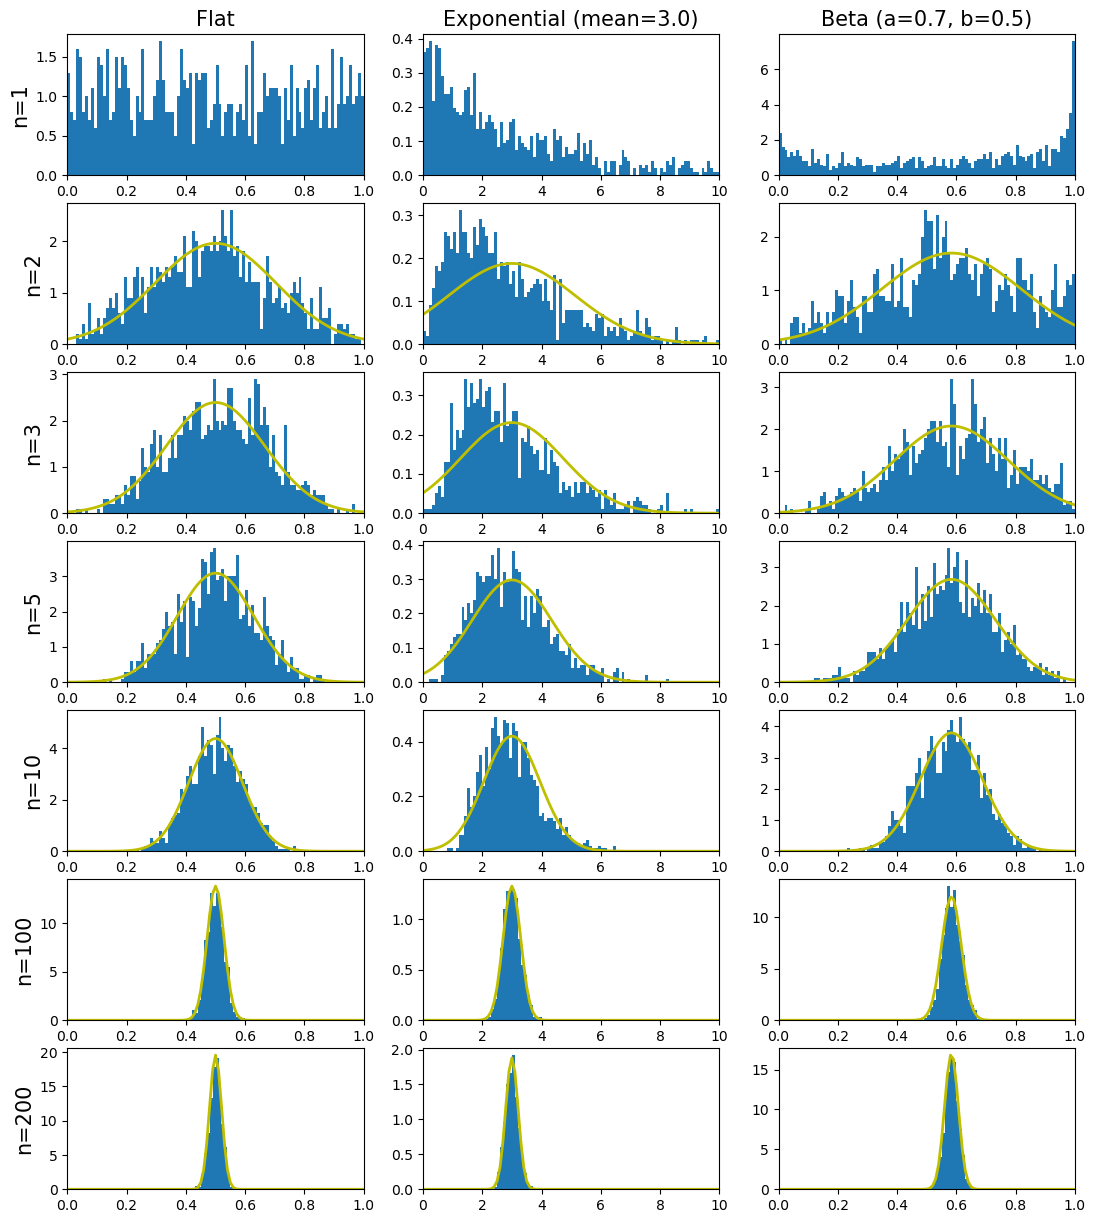

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

# Define the number of times n samples are taken and the number of bin boundaries on plots
N = 1000
nobb = 101

# Define the different values for n (number of samples to average over)
n = np.array([1, 2, 3, 5, 10, 100, 200])

# Define the mean of the exponential distribution and the parameters of the beta distribution
exp_mean = 3
a, b = 0.7, 0.5

# Create a list of distributions and their respective title names
dist = [partial(np.random.random), partial(np.random.exponential, exp_mean), partial(np.random.beta, a, b)]
title_names = ["Flat", "Exponential (mean=%.1f)" % exp_mean, "Beta (a=%.1f, b=%.1f)" % (a, b)]

# Define the ranges of the distributions, their means, and variances
drange = np.array([[0, 1], [0, 10], [0, 1]])
means = np.array([0.5, exp_mean, a/(a+b)])
var = np.array([1/12, exp_mean**2, a*b/((a+b+1)*(a+b)**2)])

# Define the bin ranges for the histograms
binrange = np.array([np.linspace(p, q, nobb) for p, q in drange])

# Set the size of the figure
ln, ld = len(n), len(dist)
plt.figure(figsize=((ld*4)+1, (ln*2)+1))

# Loop over number of n samples to average over
for i in range(ln):
    # Loop over the different distributions
    for j in range(ld):
        # Create a subplot for each combination of n and distribution
        plt.subplot(ln, ld, i*ld+1+j)
        
        # Plot the histogram of the mean of the distribution
        plt.hist(np.mean(dist[j]((N, n[i])), 1), binrange[j], density=True)

        # Set the x-limit of the plot to the range of the distribution
        plt.xlim(drange[j])
        
        # If this is the first column, add the y-label
        if j == 0:
            plt.ylabel('n=%i' % n[i], fontsize=15)
        
        # If this is the first row, add the title
        if i == 0:
            plt.title(title_names[j], fontsize=15)
        
        # If this is not the first row, plot the Central Limit Theorem curve
        else:
            clt = (1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j], clt, 'y', linewidth=2)

# Show the plot
plt.show()


* In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. Notice that the rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. Also,

* the mean of the Gaussian distribution is the same as the original parent distribution.
.

* In order to understand the Central Limit Theorem and understand why distribution of sample means is normally distributed, try tinkering around the below shiny app. Change the Parent Distribution, sample size and no of samples and see how CLT helps us make inferences about the population statistics even when the population isn't normal.

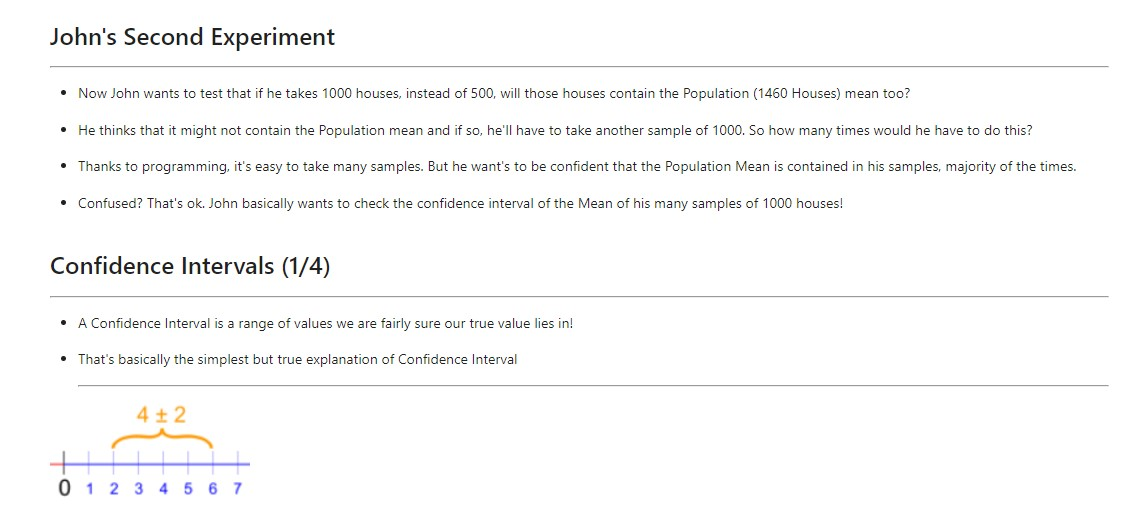

In [9]:
from IPython.display import Image
Image(filename='1.jpg')

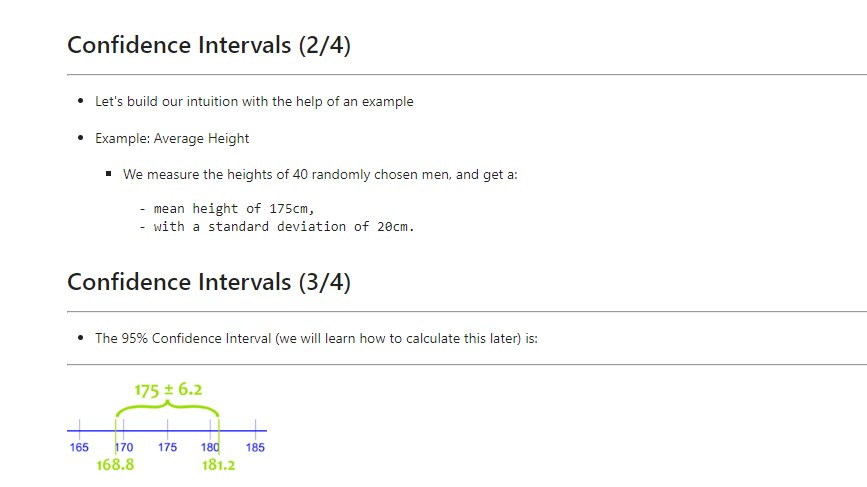

In [10]:
Image(filename='2.jpg')

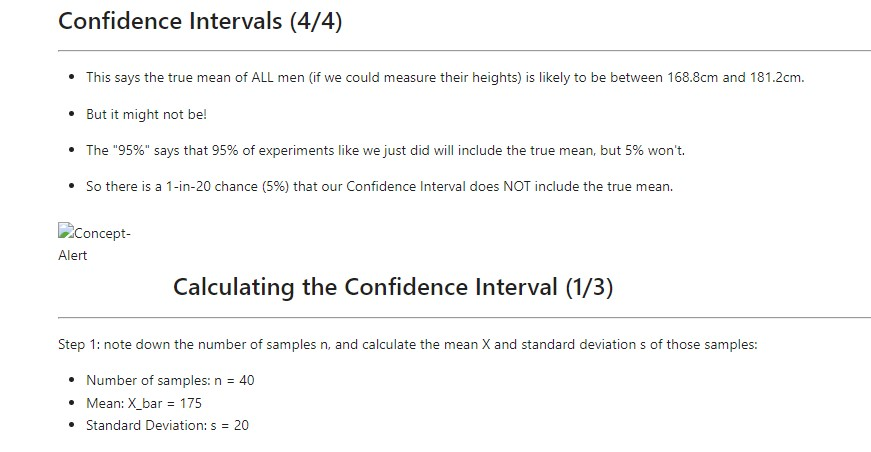

In [11]:
Image(filename='3.jpg')

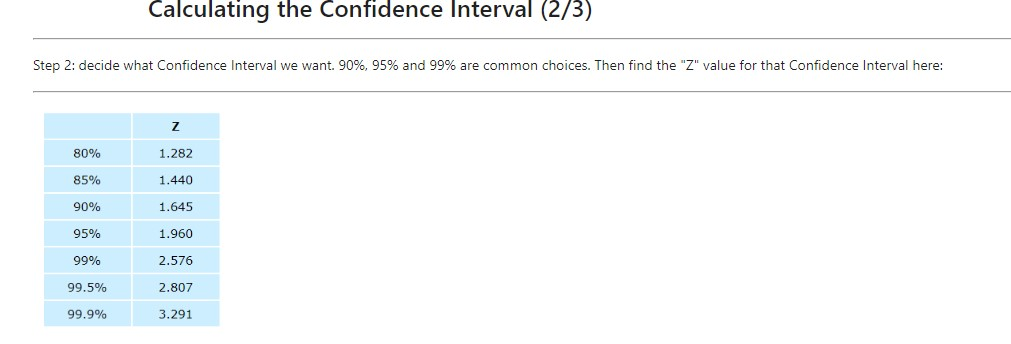

In [12]:
Image(filename='4.jpg')

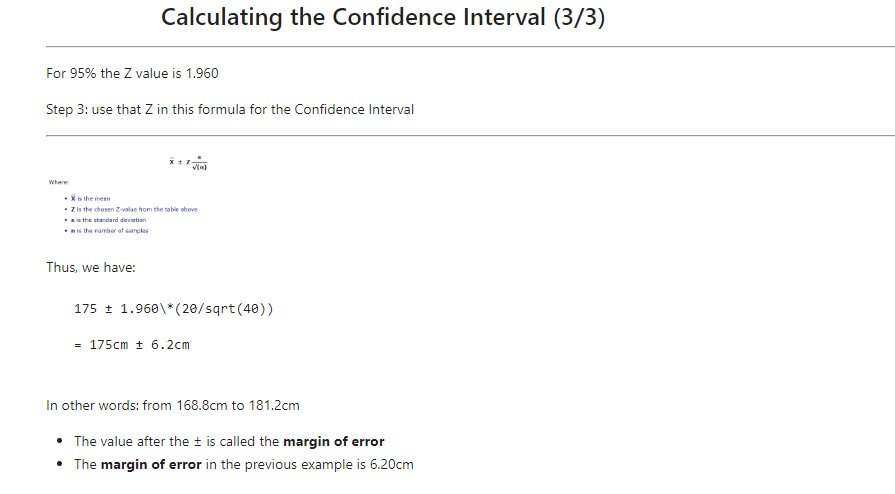

In [13]:
Image(filename='5.jpg')

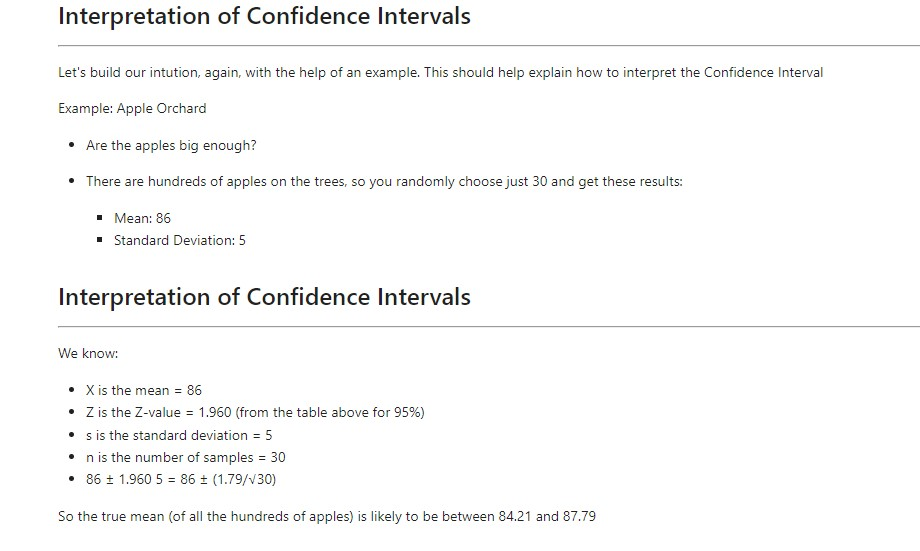

In [14]:
Image(filename='6.jpg')

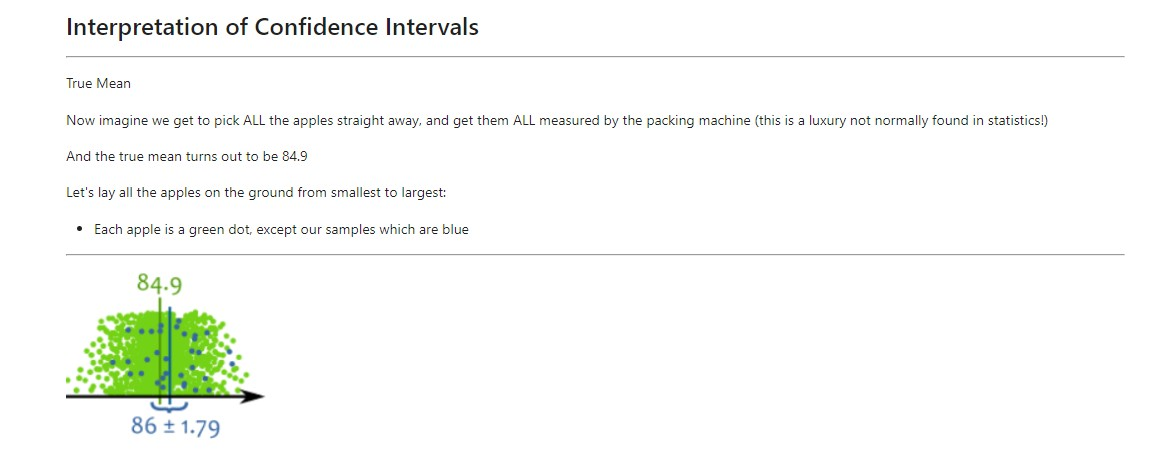

In [15]:
Image(filename='7.jpg')

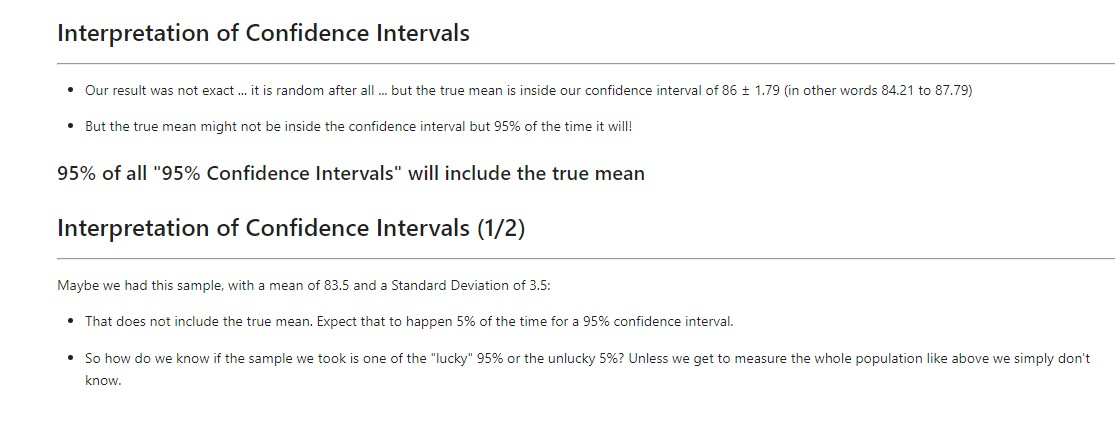

In [16]:
Image(filename='8.jpg')

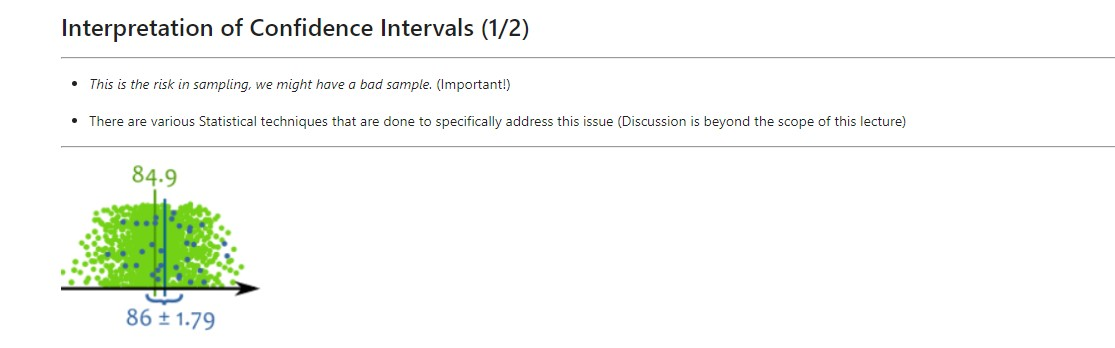

In [17]:
Image(filename='9.jpg')

In [19]:
import scipy.stats as stats
import math
import numpy as np

np.random.seed(10)

# Generate a random sample of size 1000 from the 'SalePrice' column in the data dataframe
sample_size = 1000
sample = np.random.choice(a=data['SalePrice'], size=sample_size)

# Calculate the sample mean
sample_mean = sample.mean()

# Calculate the z-critical value for a 95% confidence level
z_critical = stats.norm.ppf(q=0.95)

# Calculate the population standard deviation of the 'SalePrice' column in the data dataframe
pop_stdev = data['SalePrice'].std()

# Calculate the margin of error
margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the z-critical value, confidence interval, and true population mean
print("z-critical value:", z_critical)
print("Confidence interval:", confidence_interval)
print("True mean:", data['SalePrice'].mean())


z-critical value: 1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


* Notice that the true mean is contained in our interval.
* A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our sample's confidence intervals will contain the true population mean.

In [20]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = data['SalePrice'].std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

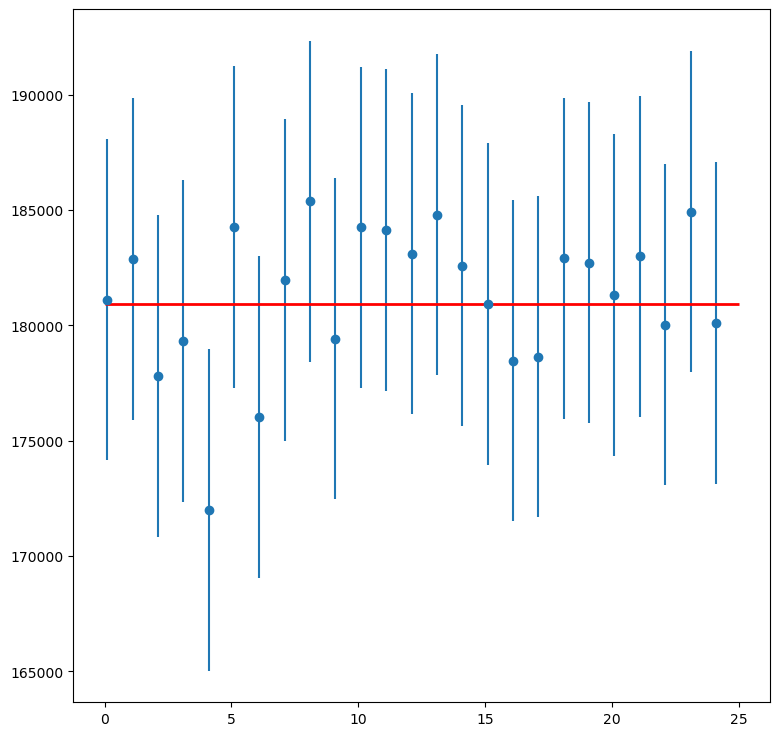

In [21]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")

## Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the times.

## Hypothesis
* A statement that might be true, which can then be tested.

* Example: Sam has a hypothesis that "large dogs are better at catching tennis balls than small dogs". We can test that hypothesis by having hundreds of different sized dogs try to catch tennis balls.

* The beauty of these Hypotheses are that they can be TESTED!
## Hypothesis Testing
* Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing.

* Therefore, in John's case the Null Hypothesis is that:

* "The Mean of House Prices in OldTown is not different from the Houses all over Brooklyn
## Why Null Hypothesis?
* The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data.
* If there is little evidence against the null hypothesis given the data, you accept the null hypothesis.
*If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on

## Alternative Hypothesis
* This is nothing but the question you ask which kind of "opposes" the Null Hypothesis

* Therefore, in John's case the Alternative Hypothesis is that:

*     "The Mean of House Prices in OldTown IS different from the Houses all over Brooklyn
* Only 1 Hypothesis can be right

* In hypothesis testing we test a sample, with the goal of accepting or rejecting a null hypothesis which is our assumption or the default position. The test tells us whether or not our primary hypothesis is true.

## Important
* The null hypothesis is assumed true and statistical evidence is required to reject it in favor of a research or alternative hypothesis
* We require a standard on the available evidence to reject the null hypothesis (convict)
* If we set a low standard , then we would increase the percentage of innocent people convicted ; however we would also increase the percentage of guilty people convicted (correctly rejecting the null)

* If we set a high standard, then we increase the the percentage of innocent people let free while we would also increase the percentage of guilty people let free (type II errors)

## Concept-Alert
## Math behind Hypothesis Testing (1/2) 
*** Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α) ***
* The significance level is a probability threshold that determines when you reject the null hypothesis.
## Concept-Alert
## Math behind Hypothesis Testing (2/2) 
* So we use this to calculate a "Test Statistic" that would further help us do further calculations.

## Math behind Hypothesis Testing
* After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative.

* This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.

## Interpretation of p-value - EASY! (1/2)
* The p-value is really not as complicated as people make it sound

* So now say that we have put a significance (alpha) = 0.05

* This means that if we see a p-value of lesser than 0.05, we reject our Null and accept the Alternative to be true
* Interpretation of p-value - EASY! (2/2)
## What you have to understand is the data from your Null hypothesis follows a distribution (Normally distributed)

* Just imagine 1 bell curve of the data from the Null Hypothesis
* Now imagine another bell curve which hypothetically defines your Alternative Hypothesis
* See below:

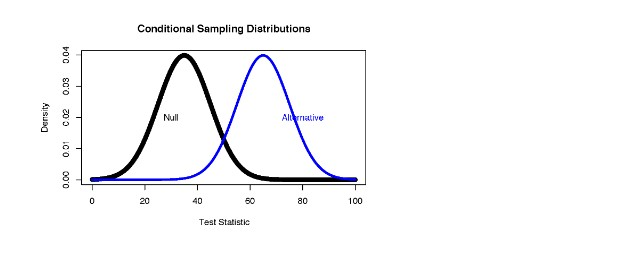

In [24]:
Image(filename='10.jpg')

## Interpretation of p-value - EASY! (1/2)
* So what the p-value says is that it is the Probability of finding the Alternative Hypothesis data in the Null Hypothesis data (bell curve 1!!)

* If it is lesser than 0.05(our threshold) then we reject it

## Interpretation of p-value - EASY! (2/2)
### Why reject it though?

* BECAUSE OUR ALTERNATIVE HYPOTHESIS DATA IS REAL! NO ONE MADE IT UP! IT IS LEGIT DATA THAT IS OBSERVED AND NOT JUST FAKE!

* So if it is real, we can say that such data isn't really described by the Null Hypothesis (Bell Curve 1) therefore the Null must be rejected as being TRUE!

* It now makes sense! P-values are cool again

In [25]:
from statsmodels.stats.weightstats import ztest
z_statistic, p_value = ztest(x1=data[data['Neighborhood'] == 'OldTown']['SalePrice'], value=data['SalePrice'].mean())
print('Z-statistic is :{}'.format(z_statistic))
print('P-value is :{}'.format(p_value))

Z-statistic is :-10.639294263334575
P-value is :1.9560526026260018e-26


## Summary of the p-value
* When performing a hypothesis test, the p-value is the probability of given or more extreme outcome given the null-hypothesis is true.

* We see that the p-value is close to zero i.e., the probability of getting the given distribution of houseprices in OldTown under the assumption that it its mean is the same as the mean of all house prices.

* So what can we infer from the p-value of our test? What should be the p-value beyond which we reject the null hypothesis.

* The p-value below which we reject our hypothesis depends on our significance level 

* For a 95% signifigance level we reject our null hypothesis if p-value is below 0.05

* In this case we can reject the null hypothesis at 95% significance.

## Another way to test: Gosset's (Student's) t-test
* The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.
* A z-test assumes a sample size >30 to work, but what if our sample is less than 30?
* A t-test solves this problem and gives us a way to do a hypothesis test on a smaller sample.

* Now, John also wants to see if house prices in Stone Brook neighborhood are different from the rest of the Houses in Brooklyn

In [27]:
print('No of houses in Stone Brook: {}'\
      .format(data['Neighborhood'].value_counts()['StoneBr']))

No of houses in Stone Brook: 25


* Lets do a t-test to test our hypothesis

In [28]:
stats.ttest_1samp(a= data[data['Neighborhood'] == 'StoneBr']['SalePrice'],               # Sample data
                 popmean= data['SalePrice'].mean())  # Pop mean

Ttest_1sampResult(statistic=5.735070151700397, pvalue=6.558704101036394e-06)

* The p-value in this case again is low and we can reject our null hypothesis
## Concept-Alert
### Type I and Type II Error 
* If we again think of hypothesis test as a criminal trial then it makes sense to frame the verdict in terms of null and alternate hypothesis:
Trial 
* Null Hypothesis: Defendant is innocent 
* Alternate Hypothesis: Defendant is guilty

## Concept-Alert
### Type I and Type II Error 
* What type of error is being committed in the following circumstances? 
* Declaring the defendant guilty when they are actually innocent? 
* Declaring the defendant innocent when they are actually guilty?
* The first one is a type I error also known as a "false positive" or "false hit".

* The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

* The second one is a type I error also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

## Type 1 Error
* Type I error describes a situation where you reject the null hypothesis when it is actually true.

* This type of error is also known as a false positive or false hit.

* The type 1 error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

## Type 2 error
* Type II error describes a situation where you fail to reject the null hypothesis when it is actually false.

* Type II error is also known as a false negative or miss. The higher your confidence level, the more likely you are to make a type II error.

## Chi-Squared Goodness-Of-Fit Test (1/2)
* A chi-squared goodness of fit tests whether the distribution of sample categorical data matches an expected distribution.

* For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.
* When working with categorical data the values the observations themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning.

## Chi-Squared Goodness-Of-Fit Test (2/2)
* Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

* Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:

In [29]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)          

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


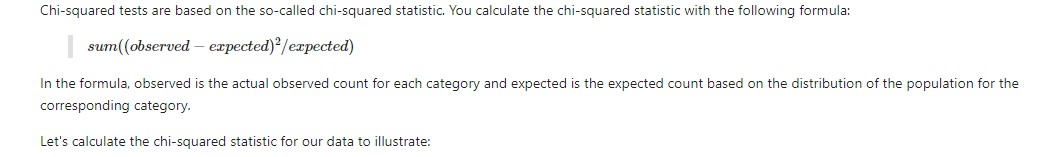

In [30]:
Image(filename='11.jpg')

In [31]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


## Note: The chi-squared test assumes none of the expected counts are less than 5.

* Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution.

* The scipy library shorthand for the chi-square distribution is chi2.

* Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result:

In [32]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

Critical value
9.487729036781154
P value
[0.00113047]


* Note: we are only interested in the right tail of the chi-square distribution. Read more on this here.

* Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

* You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():

In [33]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

## Chi-Squared Test of Independence
* Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another.

* For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent.

* On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

* The chi-squared test of independence tests whether two categorical variables are independent.

## John's final experiments
* John wants to test if knowing LandContour which is the overall flatness of the property tells him anything about the price

* He has divided the SalePrice in three buckets - High, medium, low

In [34]:
import scipy.stats as sp
def compute_freq_chi2(x,y):
    """This function will compute frequency table of x an y
    Pandas Series, and use the table to feed for the contigency table
    
    Parameters:
    -------
    x,y : Pandas Series, must be same shape for frequency table
    
    Return:
    -------
    None. But prints out frequency table, chi2 test statistic, and 
    p-value
    """
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [35]:
price = pd.qcut(data['SalePrice'], 3, labels = ['High', 'Medium', 'Low'])
compute_freq_chi2(data.LandContour, price)

Frequency table
SalePrice    High  Medium  Low
LandContour                   
Bnk            32      20   11
HLS            10      12   28
Low             8      11   17
Lvl           437     447  427
ChiSquare test statistic:  26.252544346201447
p-value:  0.00019976918050008285


* The low p-value tells us that the two variables aren't independent and knowing the LandContour of a house does tells us something about its SalePrice.
* The frequency distribution reflects this.
* Houses that are Near Flat/Level(Lvl) have an equal distribution of SalePrice.
* On the other hand houses that are at a Hillside i.e., Significant slope from side to side (HLS) have almost thrice as much houses with low price than high prices.